<a href="https://colab.research.google.com/github/mokshitha007/NIFTY-Stock--Prediction/blob/main/NIFTY_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import yfinance as yf
print("All libraries installed and working!")

All libraries installed and working!


In [ ]:
import numpy
import pandas
import sklearn
import matplotlib
print("Numpy:",numpy.__version__)
print("Pandas:",pandas.__version__)
print("Sklearn:",sklearn.__version__)
print("Matplotlib:",matplotlib.__version__)

Numpy: 2.0.2
Pandas: 2.2.2
Sklearn: 1.6.1
Matplotlib: 3.10.0


In [ ]:
data=pd.read_csv("nifty50_historical.csv")
print(data.head())
print(data.info())

        Price             Close            High               Low  \
0      Ticker             ^NSEI           ^NSEI             ^NSEI   
1        Date               NaN             NaN               NaN   
2  2015-01-02   8395.4501953125  8410.599609375   8288.7001953125   
3  2015-01-05    8378.400390625  8445.599609375    8363.900390625   
4  2015-01-06  8127.35009765625  8327.849609375  8111.35009765625   

              Open  Volume  
0            ^NSEI   ^NSEI  
1              NaN     NaN  
2  8288.7001953125  101900  
3  8407.9501953125  118200  
4  8325.2998046875  172800  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   2461 non-null   object
 1   Close   2460 non-null   object
 2   High    2460 non-null   object
 3   Low     2460 non-null   object
 4   Open    2460 non-null   object
 5   Volume  2460 non-null   object
dtypes: object(6)

In [ ]:
import pandas as pd

data = pd.read_csv("nifty50_historical.csv")

# Clean column names
data.columns = data.columns.str.strip()

# Reset index if needed
data.reset_index(inplace=True)

data.head()

,index,Price,Close,High,Low,Open,Volume
0,0,Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
1,1,Date,NaN,NaN,NaN,NaN,NaN
2,2,2015-01-02,8395.4501953125,8410.599609375,8288.7001953125,8288.7001953125,101900
3,3,2015-01-05,8378.400390625,8445.599609375,8363.900390625,8407.9501953125,118200
4,4,2015-01-06,8127.35009765625,8327.849609375,8111.35009765625,8325.2998046875,172800


Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


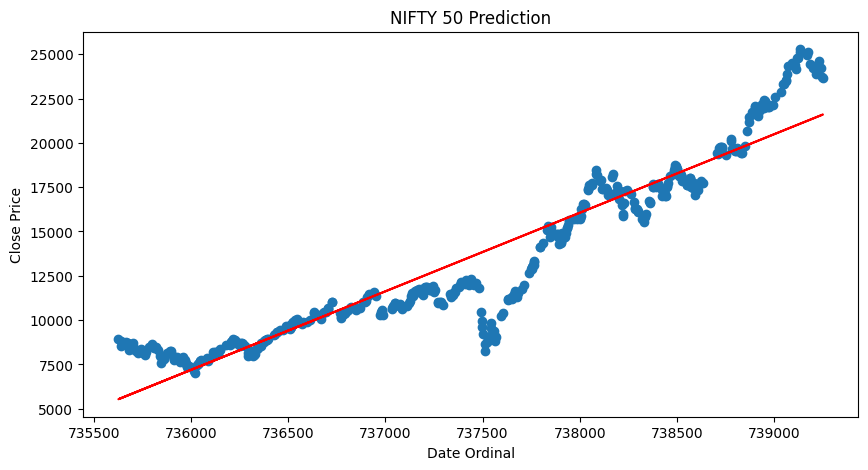

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load data, skipping the first two metadata rows
data = pd.read_csv("nifty50_historical.csv")

# Clean columns (strip whitespace)
data.columns = data.columns.str.strip()

# Drop the first two metadata rows and reset index
data = data.iloc[2:].copy()

# Rename the 'Price' column (which contains dates) to 'Date'
data.rename(columns={'Price': 'Date'}, inplace=True)

# Print columns after renaming to verify
print(data.columns)

# Convert 'Date' column to datetime objects
data['Date'] = pd.to_datetime(data['Date'])

# Convert 'Close' column to numeric
data['Close'] = pd.to_numeric(data['Close'])

# Create an ordinal representation of the date for numerical processing
data['Date_Ordinal'] = data['Date'].map(pd.Timestamp.toordinal)

# Features & Target
X = data[['Date_Ordinal']]
y = data['Close']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Plot
plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.title("NIFTY 50 Prediction")
plt.xlabel("Date Ordinal")
plt.ylabel("Close Price")
plt.show()

In [ ]:
# If index column exists
if 'index' in data.columns:
    data.rename(columns={'index': 'Date'}, inplace=True)
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)

# If Date already index
else:
    data.index = pd.to_datetime(data.index)

print("Done ✅")
print(data.head())

Done ✅
                  Close             High               Low              Open  \
Date                                                                           
2015-01-02  8395.450195   8410.599609375   8288.7001953125   8288.7001953125   
2015-01-05  8378.400391   8445.599609375    8363.900390625   8407.9501953125   
2015-01-06  8127.350098   8327.849609375  8111.35009765625   8325.2998046875   
2015-01-07  8102.100098  8151.2001953125   8065.4501953125  8118.64990234375   
2015-01-08  8234.599609           8243.5   8167.2998046875  8191.39990234375   

            Volume  Date_Ordinal  
Date                              
2015-01-02  101900        735600  
2015-01-05  118200        735603  
2015-01-06  172800        735604  
2015-01-07  164100        735605  
2015-01-08  143800        735606  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Select features (X) and target (y)
X = data[['Open', 'High', 'Low', 'Volume', 'Date_Ordinal']]
y = data['Close']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully ✅")

Model trained successfully ✅


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 39.94498879723534
RMSE: 57.98171477383344
R2 Score: 0.9994996393532505
